In [1]:
import pandas as pd
import numpy as np

# Task1 - Exploratory Data Analysis

## Loading data

In [3]:
data=pd.read_excel("./ANZ synthesised transaction dataset.xlsx")

# Exploring data issues
We started by looking at the data to find data issues and see whether the data need some cleaning. We found out that the data is missed for some of merchant data, Bpay biller code and card present flags. However, the data entries are unique and have consistent formats. Although the transactions are for 91 days( form 01/08/2018 to 31/10/2018), there are only 91 unique days. Therefore, the transactions for one of the days in this period is missing (16/08/2018). All customers were in Australia except 1 person. 

# Overal statistical insights
There are 12044 transactions in 92 days in this dataset. The amount of transactions are in the range of \\$0.1 - \\$8835.98, with an average of \\$187.93 . \%64 of transactions where authorised and the rest were posted. October had the highest avarage amount of transactions (\\$196.42) than August and September. Week 44 had the highest average amount of transactions however, there were some other days in earlier weeks which were in the peak. Credit cards had higher average amount of transaction (\%1898.72) than debit cards(\%52.57). ACT state had the highest average transaction (\\$66.80) among the states and Pantapin was the suburb with highest average transaction amount (\\$829.76). 

The customers age range is from 18 to 78 which most of them are younder than 39. However, customers in age 26 had minimum average transaction while a customer in age 52 had the highest average amount of transaction. \% 47 of customers were female and the rest were male. Male customers had higher average transaction amount (\\$205.721809) than female customers (\\$168.517303).

In [3]:
#dispalying statitical description of the dataset 
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [18]:
# finding the average amount of transactions in each month
data["extraction"]=pd.to_datetime(data.extraction)
data["extraction_month"]=data.extraction.dt.month
data["extraction_week"]=data.extraction.dt.week
print("average amount of transactions in each month", data.groupby(["extraction_month"]).amount.mean())

average amount of transactions in each month extraction_month
8     185.121867
9     182.045903
10    196.427323
Name: amount, dtype: float64


In [19]:
#proportion of different status in transactions
print("proportion of status of transactions", data.groupby(["status"]).transaction_id.count()/data.shape[0])

proportion of status of transactions status
authorized    0.640787
posted        0.359213
Name: transaction_id, dtype: float64


In [16]:
#proportion of different genders in customers
print("proportion of different genders in customers", data.groupby(["gender"]).transaction_id.count()/data.shape[0])
# average of transactions in gender level
print("\naverage transaction amount by male and female customers" ,data.groupby(["gender"]).amount.mean())

proportion of different genders in customers gender
F    0.47812
M    0.52188
Name: transaction_id, dtype: float64

average transaction amount by male and female customers gender
F    168.517303
M    205.721809
Name: amount, dtype: float64


In [21]:
mean_age=data.groupby(["age"]).amount.mean()
min_age = mean_age[mean_age==mean_age.min()]
max_age = mean_age[mean_age==mean_age.max()]
print("age of customers with lowest and highest average amount of transactions", min_age, max_age)

age of customers with lowest and highest average amount of transactions age
26    98.939406
Name: amount, dtype: float64 age
52    418.742468
Name: amount, dtype: float64


In [23]:
print("average amount of transactions by debit vs credit card", data.groupby(["movement"]).amount.mean())

average amount of transactions by debit vs credit card movement
credit    1898.728029
debit       52.572343
Name: amount, dtype: float64


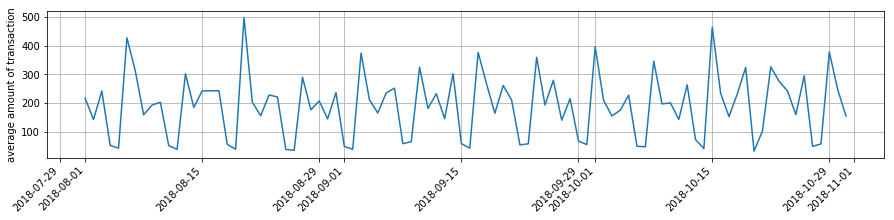

In [56]:
#ploting average daily transactions 
import matplotlib.pyplot as plt
from datetime import datetime
transactio_perday= data.groupby("date").amount.mean()
#transactio_perday.to_csv(path+"per_day_amount.csv")
fig,ax = plt.subplots(figsize=(15,3))
plt.plot(list(transactio_perday.index.values),transactio_perday.values)
fig.autofmt_xdate(rotation=45)
ax.set_ylabel("average amount of transaction")
plt.grid(True)
plt.show()

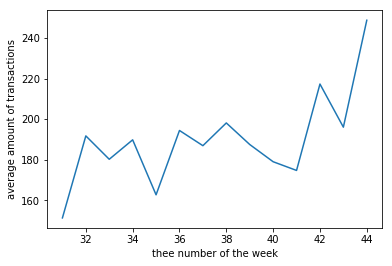

In [59]:
#ploting average weekly transactions
import matplotlib.pyplot as plt
transactio_per_w= data.groupby("extraction_week").amount.mean()
fig,ax = plt.subplots()
plt.plot(transactio_per_w.index,transactio_per_w.values)
ax.set_ylabel("average amount of transactions")
ax.set_xlabel("thee number of the week")
plt.show()

In [70]:
#average amount of transactions in different states
state_avg=data.groupby(["merchant_state"]).amount.mean().sort_values()
print(state_avg)

merchant_state
TAS    28.866618
WA     30.901873
QLD    34.372397
SA     40.425470
VIC    41.099953
NT     44.726293
NSW    47.036316
ACT    66.803836
Name: amount, dtype: float64


In [71]:
#average amount of transactions in different suburbs
suburbs_avg=data.groupby(["merchant_suburb"]).amount.mean().sort_values()
print(suburbs_avg)

merchant_suburb
Carbrook             2.080000
Woombye              2.540000
Clyde North          2.980000
Lindum               3.460000
Hallidays Point      3.860000
Marsfield            3.960000
Aveley               4.308000
Dover Heights        4.490000
Larrakeyah           4.560000
Tottenham            4.570000
Coomera              4.658571
Allora               4.715000
Duaringa             5.040000
Bullsbrook           5.050000
Gumdale              5.090000
Melba                5.270000
Miller               5.500000
Merrimac             5.570000
North Dandalup       5.660000
Sheldon              5.710000
Dutton Park          5.710000
Trafalgar            5.730000
Waterford West       5.800000
Redbank Plains       5.890000
Tweed Heads          5.943333
Karnup               5.950000
Barrington           6.000000
Sydney Airport       6.040000
Henley Beach         6.050000
Cumberland Park      6.050000
                      ...    
Malvern            173.688261
Keperra            206.7

# Task 2 - Building a Predictive Model

In order to build a predictive model for the salary of customers, we first need to calculate the salary of each customer. Then, we need to find informative features that could be useful for the model and have correlations with the salary. Finally we can try and evaulate various regression algorithms such as linear regression, decision tree and etc. 

In [107]:
# finding the salary of customers
customer_salary = data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()["amount"]
customer_data_first = data.groupby("customer_id").first()
customer_data_mean = data.groupby("customer_id").mean()
customer_data = customer_data_first.join(customer_salary, rsuffix = "-salary").join(customer_data_mean, rsuffix = "-mean")

card_present_flag        -0.003214
bpay_biller_code               NaN
merchant_code                  NaN
balance                   0.170282
age                      -0.135264
amount                    0.109259
amount-salary             1.000000
card_present_flag-mean   -0.147639
merchant_code-mean             NaN
balance-mean              0.205646
age-mean                 -0.135264
amount-mean               0.289481
Name: amount-salary, dtype: float64


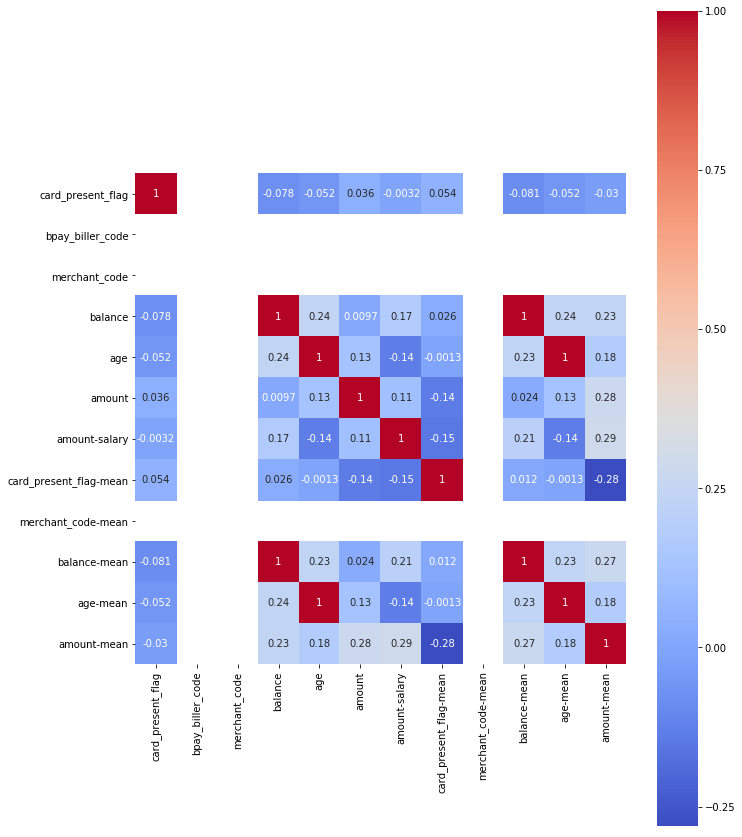

In [110]:
#calculating correlations
corr_matrix =customer_data.corr()
#illustrating a heatmap for corraltion
import matplotlib.pyplot as plt
import seaborn as sns 

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      cmap = 'coolwarm',
                      annot = True)
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

print(corr_matrix["amount-salary"])